# **Produire une étude de marché sur l'export de poulet bio à l'étranger**

# **Etape 1 - Importation des librairies et chargement des fichiers**

**1.1 - Importation des librairies**

In [259]:
#Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy as sp

**1.2 - Chargement des fichiers**

In [260]:
#Importation du fichier GDP_growth.csv
gdp_growth = pd.read_csv('GDP_growth.csv')

#Importation du fichier PIB_habitant.csv
pib_habitant = pd.read_csv('PIB_habitant.csv')

#Importation du fichier besoins_energetiques.csv
besoins_energetiques = pd.read_csv('besoins_energetiques.csv')

#Importation du fichier consommation_poulet.xlsx
consommation_poulet = pd.read_excel('consommation_poulet.xlsx')

#Importation du fichier cout_viande.csv
cout_viande = pd.read_csv('cout_viande.csv')

#Importation du fichier disponibilite_alimentaire_viande.csv
disponibilite_alimentaire_viande = pd.read_csv('disponibilite_alimentaire_viande.csv')

#Importation du fichier food_inflation.csv
food_inflation = pd.read_csv('food_inflation.csv')

#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier population_growth.csv
population_growth = pd.read_csv('population_growth.csv')

#Importation du fichier production_poulet.csv
production_poulet = pd.read_csv('production_poulet.csv')

#Importation du fichier tariff_primary_products.xlsx
tariff_pp = pd.read_excel('tariff_primary_products.xlsx')

# **Etape 2 - Analyse exploratoire des fichiers**

### **2.1 - Analyse exploratoire du fichier population**

In [261]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
for i in population.columns:
    print ("---- %s ---" % i)
    print(population[i].value_counts())

---- Domain Code ---
OA    235
Name: Domain Code, dtype: int64
---- Domain ---
Annual population    235
Name: Domain, dtype: int64
---- Area Code (M49) ---
4      1
591    1
554    1
558    1
562    1
      ..
276    1
288    1
292    1
300    1
716    1
Name: Area Code (M49), Length: 235, dtype: int64
---- Area ---
Afghanistan    1
Panama         1
New Zealand    1
Nicaragua      1
Niger          1
              ..
Germany        1
Ghana          1
Gibraltar      1
Greece         1
Zimbabwe       1
Name: Area, Length: 235, dtype: int64
---- Element Code ---
511    235
Name: Element Code, dtype: int64
---- Element ---
Total Population - Both sexes    235
Name: Element, dtype: int64
---- Item Code ---
3010    235
Name: Item Code, dtype: int64
---- Item ---
Population - Est. & Proj.    235
Name: Item, dtype: int64
---- Year Code ---
2021    235
Name: Year Code, dtype: int64
---- Year ---
2021    235
Name: Year, dtype: int64
---- Unit ---
1000 No    235
Name: Unit, dtype: int64
---- Value

In [262]:
#suppression des colonnes inutiles
population = population[['Area', 'Value']]
#on renomme les colonnes
population = population.rename(columns={'Area': 'country', 'Value': 'Pop. (21)'})

In [263]:
#vérification valeurs nulles
population.isnull().values.any()

False

In [264]:
#vérification des doublons dans le pays
population.loc[population['country'].duplicated(keep=False),:]

,country,Pop. (21)


In [265]:
#multiplication par 1000
population['Pop. (21)'] = round(population['Pop. (21)'] * 1000, 0)

In [266]:
#on cherche les pays qui risquent d'être nommés différemment dans les autres tables (et qu'on ne peut pas remplacer de manière mécanique)
population[population['country'].str.contains('Korea|China|United|USA')]

,country,Pop. (21)
42,China,1.457935e+09
43,"China, Hong Kong SAR",7.494578e+06
44,"China, Macao SAR",6.866070e+05
45,"China, mainland",1.425893e+09
46,"China, Taiwan Province of",2.385991e+07
58,Democratic People's Republic of Korea,2.597191e+07
170,Republic of Korea,5.183014e+07
220,United Arab Emirates,9.365145e+06
221,United Kingdom of Great Britain and Northern I...,6.728104e+07
222,United Republic of Tanzania,6.358833e+07


In [267]:
#on renomme les pays
population.iloc[58,0] = 'North Korea'
population.iloc[170,0] = 'South Korea'
population.iloc[223,0] = 'USA'
to_replace = {
    "Bolivia": "Bolivia",
    "Bahamas": "Bahamas",
    "Curaçao": "Curacao",
    "Egypt": "Egypt",
    "Guinea-Bissau": "Guinea-Bissau",
    "Gambia": "Gambia",
    "Micronesia": "Micronesia",
    "Syrian": "Syria",
    "Tanzania": "Tanzania",
    "Venezuela": "Venezuela",
    "Yemen": "Yemen",
    "Netherlands": "Netherlands",
    "Türkiye": "Turkey",
    "Turkiye": "Turkey",
    "Iran": "Iran",
    "Macao": "Macao",
    "Hong Kong": "Hong Kong",
    "Russian Federation": "Russia",
    "United Kingdom": "UK",
    "Côte d'Ivoire": "Ivory Coast",
    "Taiwan": "Taiwan",
    "Taïwan": "Taiwan",
    "Tanzania": "Tanzania",
    "VietNam": "Viet Nam",
    "Vietnam": "Viet Nam"
}
for i in population.index:
    for key in to_replace:
        if key in str(population['country'][i]):
            population['country'][i] = to_replace.get(key)

<ipython-input-267-1ba631fefaaf>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['country'][i] = to_replace.get(key)


### **2.2 - Analyse exploratoire du fichier GDP_growth**

In [268]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
for i in gdp_growth.columns:
    print ("---- %s ---" % i)
    print(gdp_growth[i].value_counts())

---- Series Name ---
GDP per capita growth (annual %)                    266
Data from database: World Development Indicators      1
Last Updated: 12/18/2023                              1
Name: Series Name, dtype: int64
---- Series Code ---
NY.GDP.PCAP.KD.ZG    266
Name: Series Code, dtype: int64
---- Country Name ---
Afghanistan     1
St. Lucia       1
Serbia          1
Seychelles      1
Sierra Leone    1
               ..
Isle of Man     1
Israel          1
Italy           1
Jamaica         1
World           1
Name: Country Name, Length: 266, dtype: int64
---- Country Code ---
AFG    1
LCA    1
SRB    1
SYC    1
SLE    1
      ..
IMN    1
ISR    1
ITA    1
JAM    1
WLD    1
Name: Country Code, Length: 266, dtype: int64
---- 2022 [YR2022] ---
..                  24
5.51932894130897     2
8.72872846140156     1
1.50900296982283     1
5.16395693805021     1
                    ..
4.69395636247876     1
7.42658177833613     1
4.75267735474706     1
4.06375128395906     1
2.2747634180271

In [269]:
#suppression des colonnes inutiles
gdp_growth = gdp_growth[['Country Name', '2022 [YR2022]']]
#on renomme les colonnes
gdp_growth = gdp_growth.rename(columns={'Country Name': 'country', '2022 [YR2022]': 'GDP gr. (22)'})

In [270]:
#nettoyage des valeurs nulles ou non renseignées
gdp_growth = gdp_growth[pd.to_numeric(gdp_growth['GDP gr. (22)'], errors='coerce').notnull()].reset_index(drop=True)

In [271]:
gdp_growth['GDP gr. (22)'] = gdp_growth['GDP gr. (22)'].astype(float)
gdp_growth.describe()

,GDP gr. (22)
count,242.000000
mean,3.189143
std,5.936714
min,-22.419285
25%,1.303224
50%,2.785942
75%,4.737997
max,62.528291


In [272]:
#vérification valeurs nulles
gdp_growth.isnull().values.any()

False

In [273]:
#vérification des doublons dans le pays
gdp_growth.loc[gdp_growth['country'].duplicated(keep=False),:]

,country,GDP gr. (22)


In [274]:
#on cherche les pays qui risquent d'être nommés différemment dans les autres tables
gdp_growth[gdp_growth['country'].str.contains('Korea|China|United|USA')]

,country,GDP gr. (22)
37,China,3.002576
78,"Hong Kong SAR, China",-2.595987
94,"Korea, Rep.",2.844735
105,"Macao SAR, China",-22.419285
184,United Arab Emirates,6.982417
185,United Kingdom,4.432095
186,United States,1.551487


In [275]:
#on renomme les pays
gdp_growth.iloc[94,0] = 'South Korea'
gdp_growth.iloc[186,0] = 'USA'
for i in gdp_growth.index:
    for key in to_replace:
        if key in str(gdp_growth['country'][i]):
            gdp_growth['country'][i] = to_replace.get(key)

<ipython-input-275-9c702a5a7c4e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_growth['country'][i] = to_replace.get(key)


### **2.3 - Analyse exploratoire du fichier PIB_habitant**

In [276]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
for i in pib_habitant.columns:
    print ("---- %s ---" % i)
    print(pib_habitant[i].value_counts())

---- Domain Code ---
MK    209
Name: Domain Code, dtype: int64
---- Domain ---
Macro Indicators    209
Name: Domain, dtype: int64
---- Area Code (M49) ---
4      1
428    1
524    1
528    1
540    1
      ..
266    1
270    1
268    1
276    1
716    1
Name: Area Code (M49), Length: 209, dtype: int64
---- Area ---
Afghanistan                     1
Latvia                          1
Nepal                           1
Netherlands (Kingdom of the)    1
New Caledonia                   1
                               ..
Gabon                           1
Gambia                          1
Georgia                         1
Germany                         1
Zimbabwe                        1
Name: Area, Length: 209, dtype: int64
---- Element Code ---
6119    209
Name: Element Code, dtype: int64
---- Element ---
Value US$ per capita    209
Name: Element, dtype: int64
---- Item Code ---
22008    209
Name: Item Code, dtype: int64
---- Item ---
Gross Domestic Product    209
Name: Item, dtype: int64


In [277]:
#suppression des colonnes inutiles
pib_habitant = pib_habitant[['Area', 'Value']]
#on renomme les colonnes
pib_habitant = pib_habitant.rename(columns={'Area': 'country', 'Value': 'US$/cap (22)'})

In [278]:
#vérification valeurs nulles
pib_habitant.isnull().values.any()

False

In [279]:
#vérification des doublons dans le pays
pib_habitant.loc[pib_habitant['country'].duplicated(keep=False),:]

,country,US$/cap (22)


In [280]:
pib_habitant.describe()

,US$/cap (22)
count,209.000000
mean,19310.989525
std,29170.808374
min,326.029100
25%,2415.562268
50%,7274.228494
75%,22724.236728
max,219959.272326


In [281]:
#on cherche les pays qui risquent d'être nommés différemment dans les autres tables
pib_habitant[pib_habitant['country'].str.contains('Korea|China|United|USA')]

,country,US$/cap (22)
40,China,12731.629527
41,"China, Hong Kong SAR",48084.025829
42,"China, Macao SAR",31387.932591
43,"China, mainland",12536.860571
55,Democratic People's Republic of Korea,654.510035
155,Republic of Korea,32137.788420
198,United Arab Emirates,52520.336562
199,United Kingdom of Great Britain and Northern I...,45614.961415
200,United Republic of Tanzania,1185.367939
201,United States of America,75268.885406


In [282]:
#on renomme les pays
pib_habitant.iloc[55,0] = 'North Korea'
pib_habitant.iloc[155,0] = 'South Korea'
pib_habitant.iloc[201,0] = 'USA'
for i in pib_habitant.index:
    for key in to_replace:
        if key in str(pib_habitant['country'][i]):
            pib_habitant['country'][i] = to_replace.get(key)

<ipython-input-282-25a888877c78>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pib_habitant['country'][i] = to_replace.get(key)


### **2.4 - Analyse exploratoire du fichier besoins_energetiques**

In [283]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
for i in besoins_energetiques.columns:
    print ("---- %s ---" % i)
    print(besoins_energetiques[i].value_counts())

---- Domain Code ---
FS    388
Name: Domain Code, dtype: int64
---- Domain ---
Suite of Food Security Indicators    388
Name: Domain, dtype: int64
---- Area Code (M49) ---
4      2
643    2
540    2
554    2
558    2
      ..
266    2
270    2
268    2
276    2
716    2
Name: Area Code (M49), Length: 194, dtype: int64
---- Area ---
Afghanistan           2
Russian Federation    2
New Caledonia         2
New Zealand           2
Nicaragua             2
                     ..
Gabon                 2
Gambia                2
Georgia               2
Germany               2
Zimbabwe              2
Name: Area, Length: 194, dtype: int64
---- Element Code ---
6128    388
Name: Element Code, dtype: int64
---- Element ---
Value    388
Name: Element, dtype: int64
---- Item Code ---
21056    194
21057    194
Name: Item Code, dtype: int64
---- Item ---
Minimum dietary energy requirement  (kcal/cap/day)    194
Average dietary energy requirement (kcal/cap/day)     194
Name: Item, dtype: int64
---- Year

In [284]:
#suppression des colonnes inutiles
besoins_energetiques = besoins_energetiques[['Area', 'Item', 'Value']]
#on renomme les colonnes
besoins_energetiques = besoins_energetiques.rename(columns={'Area': 'country'})

In [285]:
#transformer le tableau pour avoir 1 seule ligne pays
besoins_energetiques = besoins_energetiques.pivot_table('Value', 'country', 'Item')
besoins_energetiques = besoins_energetiques.reset_index()
#on renomme les colonnes
besoins_energetiques = besoins_energetiques.rename(columns={'Average dietary energy requirement (kcal/cap/day)': 'Av. en. req. (kcal/cap/day)', 'Minimum dietary energy requirement (kcal/cap/day)': 'Min. en. req. (kcal/cap/day)'})

In [286]:
#vérification valeurs nulles
besoins_energetiques.isnull().values.any()

False

In [287]:
#vérification des doublons dans le pays
besoins_energetiques.loc[besoins_energetiques['country'].duplicated(keep=False),:]

Item,country,Av. en. req. (kcal/cap/day),Minimum dietary energy requirement (kcal/cap/day)


In [288]:
besoins_energetiques.describe()

Item,Av. en. req. (kcal/cap/day),Minimum dietary energy requirement (kcal/cap/day)
count,194.000000,194.000000
mean,2368.020619,1833.726804
std,125.697637,83.602579
min,2104.000000,1658.000000
25%,2264.500000,1767.500000
50%,2374.500000,1838.500000
75%,2477.750000,1908.500000
max,2658.000000,2040.000000


In [289]:
#on cherche les pays qui risquent d'être nommés différemment dans les autres tables
besoins_energetiques[besoins_energetiques['country'].str.contains('Korea|China|United|USA')]

Item,country,Av. en. req. (kcal/cap/day),Minimum dietary energy requirement (kcal/cap/day)
35,China,2443,1885
36,"China, Hong Kong SAR",2427,1869
37,"China, Macao SAR",2430,1873
38,"China, Taiwan Province of",2466,1897
39,"China, mainland",2443,1885
49,Democratic People's Republic of Korea,2405,1856
142,Republic of Korea,2466,1896
182,United Arab Emirates,2658,2040
183,United Kingdom of Great Britain and Northern I...,2492,1914
184,United Republic of Tanzania,2139,1680


In [290]:
#on renomme les pays
besoins_energetiques.iloc[49,0] = 'North Korea'
besoins_energetiques.iloc[142,0] = 'South Korea'
besoins_energetiques.iloc[185,0] = 'USA'
for i in besoins_energetiques.index:
    for key in to_replace:
        if key in str(besoins_energetiques['country'][i]):
            besoins_energetiques['country'][i] = to_replace.get(key)

<ipython-input-290-83609077c780>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  besoins_energetiques['country'][i] = to_replace.get(key)


### **2.5 - Analyse exploratoire du fichier consommation_poulet**

In [291]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
for i in consommation_poulet.columns:
    print ("---- %s ---" % i)
    print(consommation_poulet[i].value_counts())

---- Poultry Meat Consumption Per Capita ---
Yearly Data                   1
Norway                        1
Myanmar                       1
Namibia                       1
Nepal                         1
                             ..
Georgia                       1
Germany                       1
Ghana                         1
Greece                        1
Dem. Republic of the Congo    1
Name: Poultry Meat Consumption Per Capita, Length: 172, dtype: int64
---- Unnamed: 1 ---
kg       171
Units      1
Name: Unnamed: 1, dtype: int64
---- Unnamed: 2 ---
locked    135
...        36
1961        1
Name: Unnamed: 2, dtype: int64
---- Unnamed: 3 ---
locked    135
...        36
1962        1
Name: Unnamed: 3, dtype: int64
---- Unnamed: 4 ---
locked    135
...        36
1963        1
Name: Unnamed: 4, dtype: int64
---- Unnamed: 5 ---
locked    135
...        36
1964        1
Name: Unnamed: 5, dtype: int64
---- Unnamed: 6 ---
locked    135
...        36
1965        1
Name: Unnamed: 6, dtype

In [292]:
#suppression des colonnes inutiles
consommation_poulet = consommation_poulet[['Poultry Meat Consumption Per Capita', 'Unnamed: 60']]
#on renomme les colonnes
consommation_poulet = consommation_poulet.rename(columns={'Poultry Meat Consumption Per Capita': 'country', 'Unnamed: 60': 'Poult. con/cap (kg, 19)'})

In [293]:
consommation_poulet = consommation_poulet.iloc[2:,:].reset_index(drop=True)

In [294]:
#vérification valeurs nulles
consommation_poulet.isnull().values.any()

False

In [295]:
#vérification des doublons dans le pays
consommation_poulet.loc[consommation_poulet['country'].duplicated(keep=False),:]

,country,"Poult. con/cap (kg, 19)"


In [296]:
#nettoyage des valeurs nulles ou non renseignées
consommation_poulet = consommation_poulet[pd.to_numeric(consommation_poulet['Poult. con/cap (kg, 19)'], errors='coerce').notnull()].reset_index(drop=True)

In [297]:
consommation_poulet['Poult. con/cap (kg, 19)'] = consommation_poulet['Poult. con/cap (kg, 19)'].astype(float)
consommation_poulet.describe()

,"Poult. con/cap (kg, 19)"
count,165.000000
mean,19.754121
std,15.429222
min,0.470000
25%,5.900000
50%,18.560000
75%,28.670000
max,69.480000


In [298]:
#on cherche les pays qui risquent d'être nommés différemment dans les autres tables
consommation_poulet[consommation_poulet['country'].str.contains('Korea|China|United|USA')]

,country,"Poult. con/cap (kg, 19)"
30,China,14.85
39,Dem. People's Republic of Korea,1.95
134,South Korea,20.95
154,United Arab Emirates,35.21
155,United Kingdom,34.22
156,USA,57.47


In [299]:
#on renomme les pays
consommation_poulet.iloc[39,0] = 'North Korea'
for i in consommation_poulet.index:
    for key in to_replace:
        if key in str(consommation_poulet['country'][i]):
            consommation_poulet['country'][i] = to_replace.get(key)

<ipython-input-299-e91e6a2a5e35>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consommation_poulet['country'][i] = to_replace.get(key)


### **2.6 - Analyse exploratoire du fichier cout_viande**

In [300]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
for i in cout_viande.columns:
    print ("---- %s ---" % i)
    print(cout_viande[i].value_counts())

---- Domain Code ---
CAHD    169
Name: Domain Code, dtype: int64
---- Domain ---
Cost and Affordability of a Healthy Diet (CoAHD)    169
Name: Domain, dtype: int64
---- Area Code (M49) ---
8      1
566    1
508    1
104    1
516    1
      ..
231    1
242    1
246    1
250    1
716    1
Name: Area Code (M49), Length: 169, dtype: int64
---- Area ---
Albania       1
Nigeria       1
Mozambique    1
Myanmar       1
Namibia       1
             ..
Ethiopia      1
Fiji          1
Finland       1
France        1
Zimbabwe      1
Name: Area, Length: 169, dtype: int64
---- Element Code ---
6226    169
Name: Element Code, dtype: int64
---- Element ---
Value    169
Name: Element, dtype: int64
---- Item Code ---
7008    169
Name: Item Code, dtype: int64
---- Item ---
Cost of animal source foods    169
Name: Item, dtype: int64
---- Year Code ---
2017    169
Name: Year Code, dtype: int64
---- Year ---
2017    169
Name: Year, dtype: int64
---- Unit ---
PPP dollar per person per day    169
Name: Unit, 

In [301]:
#suppression des colonnes inutiles
cout_viande = cout_viande[['Area', 'Value']]
#on renomme les colonnes
cout_viande = cout_viande.rename(columns={'Area': 'country', 'Value': 'ASF cost (PPP$/cap/day)'})

In [302]:
#vérification valeurs nulles
cout_viande.isnull().values.any()

False

In [303]:
#vérification des doublons dans le pays
cout_viande.loc[cout_viande['country'].duplicated(keep=False),:]

,country,ASF cost (PPP$/cap/day)


In [304]:
cout_viande.describe()

,ASF cost (PPP$/cap/day)
count,169.000000
mean,0.873213
std,0.214233
min,0.377000
25%,0.702000
50%,0.848000
75%,1.016000
max,1.583000


In [305]:
#on cherche les pays qui risquent d'être nommés différemment dans les autres tables
cout_viande[cout_viande['country'].str.contains('Korea|China|United|USA')]

,country,ASF cost (PPP$/cap/day)
37,"China, Hong Kong SAR",1.034
38,"China, mainland",0.672
39,"China, Taiwan Province of",0.911
129,Republic of Korea,1.188
161,United Arab Emirates,0.856
162,United Kingdom of Great Britain and Northern I...,0.494
163,United Republic of Tanzania,0.657
164,United States of America,0.557


In [306]:
#on renomme les pays
cout_viande.iloc[38,0] = 'China'
cout_viande.iloc[129,0] = 'South Korea'
cout_viande.iloc[164,0] = 'USA'
for i in cout_viande.index:
    for key in to_replace:
        if key in str(cout_viande['country'][i]):
            cout_viande['country'][i] = to_replace.get(key)

<ipython-input-306-d49986fa8588>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cout_viande['country'][i] = to_replace.get(key)


### **2.7 - Analyse exploratoire du fichier disponibilite_alimentaire_viande**

In [307]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
for i in disponibilite_alimentaire_viande.columns:
    print ("---- %s ---" % i)
    print(disponibilite_alimentaire_viande[i].value_counts())

---- Domain Code ---
SUA    186
Name: Domain Code, dtype: int64
---- Domain ---
Availability (based on supply utilization accounts)    186
Name: Domain, dtype: int64
---- Area Code (M49) ---
4      1
512    1
524    1
528    1
540    1
      ..
270    1
268    1
276    1
288    1
716    1
Name: Area Code (M49), Length: 186, dtype: int64
---- Area ---
Afghanistan                     1
Oman                            1
Nepal                           1
Netherlands (Kingdom of the)    1
New Caledonia                   1
                               ..
Gambia                          1
Georgia                         1
Germany                         1
Ghana                           1
Zimbabwe                        1
Name: Area, Length: 186, dtype: int64
---- Food Group Code ---
FG7    186
Name: Food Group Code, dtype: int64
---- Food Group ---
Meat and meat products    186
Name: Food Group, dtype: int64
---- Indicator Code ---
4003    186
Name: Indicator Code, dtype: int64
---- Indica

In [308]:
#suppression des colonnes inutiles
disponibilite_alimentaire_viande = disponibilite_alimentaire_viande[['Area', 'Value']]
#on renomme les colonnes
disponibilite_alimentaire_viande = disponibilite_alimentaire_viande.rename(columns={'Area': 'country', 'Value': 'Meat en. supply (kcal/cap/d)'})

In [309]:
#vérification valeurs nulles
disponibilite_alimentaire_viande.isnull().values.any()

False

In [310]:
#vérification des doublons dans le pays
disponibilite_alimentaire_viande.loc[disponibilite_alimentaire_viande['country'].duplicated(keep=False),:]

,country,Meat en. supply (kcal/cap/d)


In [311]:
disponibilite_alimentaire_viande.describe()

,Meat en. supply (kcal/cap/d)
count,186.000000
mean,247.602151
std,144.625043
min,19.000000
25%,115.250000
50%,244.500000
75%,349.750000
max,735.000000


In [312]:
#on cherche les pays qui risquent d'être nommés différemment dans les autres tables
disponibilite_alimentaire_viande[disponibilite_alimentaire_viande['country'].str.contains('Korea|China|United|USA')]

,country,Meat en. supply (kcal/cap/d)
33,China,375
34,"China, Hong Kong SAR",735
35,"China, Macao SAR",516
36,"China, mainland",369
37,"China, Taiwan Province of",427
47,Democratic People's Republic of Korea,62
137,Republic of Korea,364
174,United Arab Emirates,353
175,United Kingdom of Great Britain and Northern I...,382
176,United Republic of Tanzania,67


In [313]:
#on renomme les pays
disponibilite_alimentaire_viande.iloc[47,0] = 'North Korea'
disponibilite_alimentaire_viande.iloc[137,0] = 'South Korea'
disponibilite_alimentaire_viande.iloc[177,0] = 'USA'
for i in disponibilite_alimentaire_viande.index:
    for key in to_replace:
        if key in str(disponibilite_alimentaire_viande['country'][i]):
            disponibilite_alimentaire_viande['country'][i] = to_replace.get(key)

<ipython-input-313-7ed4d3e98fc6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disponibilite_alimentaire_viande['country'][i] = to_replace.get(key)


### **2.8 - Analyse exploratoire du fichier food_inflation**

In [314]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
for i in food_inflation.columns:
    print ("---- %s ---" % i)
    print(food_inflation[i].value_counts())

---- Domain Code ---
CP    203
Name: Domain Code, dtype: int64
---- Domain ---
Consumer Price Indices    203
Name: Domain, dtype: int64
---- Area Code (M49) ---
4      1
585    1
528    1
540    1
554    1
      ..
266    1
270    1
268    1
276    1
716    1
Name: Area Code (M49), Length: 203, dtype: int64
---- Area ---
Afghanistan                     1
Palau                           1
Netherlands (Kingdom of the)    1
New Caledonia                   1
New Zealand                     1
                               ..
Gabon                           1
Gambia                          1
Georgia                         1
Germany                         1
Zimbabwe                        1
Name: Area, Length: 203, dtype: int64
---- Year Code ---
2023    203
Name: Year Code, dtype: int64
---- Year ---
2023    203
Name: Year, dtype: int64
---- Item Code ---
23014    203
Name: Item Code, dtype: int64
---- Item ---
Food price inflation    203
Name: Item, dtype: int64
---- Months Code ---
700

In [315]:
#suppression des colonnes inutiles
food_inflation = food_inflation[['Area', 'Value']]
#on renomme les colonnes
food_inflation = food_inflation.rename(columns={'Area': 'country', 'Value': 'Food inf. (09/23)'})

In [316]:
#vérification valeurs nulles
food_inflation.isnull().values.any()

False

In [317]:
#vérification des doublons dans le pays
food_inflation.loc[food_inflation['country'].duplicated(keep=False),:]

,country,Food inf. (09/23)


In [318]:
food_inflation.describe()

,Food inf. (09/23)
count,203.000000
mean,13.141284
std,31.153105
min,-10.729905
25%,4.113134
50%,7.556828
75%,10.557544
max,318.092663


In [319]:
#on cherche les pays qui risquent d'être nommés différemment dans les autres tables
food_inflation[food_inflation['country'].str.contains('Korea|China|United|USA')]

,country,Food inf. (09/23)
40,"China, Hong Kong SAR",3.658537
41,"China, Macao SAR",2.628033
42,"China, mainland",-3.246470
150,Republic of Korea,5.124700
191,United Arab Emirates,2.662369
192,United Kingdom of Great Britain and Northern I...,12.207358
193,United Republic of Tanzania,5.610514
194,United States of America,2.376874


In [320]:
#on renomme les pays
food_inflation.iloc[42,0] = 'China'
food_inflation.iloc[150,0] = 'South Korea'
food_inflation.iloc[194,0] = 'USA'
for i in food_inflation.index:
    for key in to_replace:
        if key in str(food_inflation['country'][i]):
            food_inflation['country'][i] = to_replace.get(key)

<ipython-input-320-17e447d5e560>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_inflation['country'][i] = to_replace.get(key)


### **2.9 - Analyse exploratoire du fichier population_growth**

In [321]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
for i in population_growth.columns:
    print ("---- %s ---" % i)
    print(population_growth[i].value_counts())

---- Series Name ---
Population growth (annual %)                        266
Data from database: World Development Indicators      1
Last Updated: 12/18/2023                              1
Name: Series Name, dtype: int64
---- Series Code ---
SP.POP.GROW    266
Name: Series Code, dtype: int64
---- Country Name ---
Afghanistan     1
St. Lucia       1
Serbia          1
Seychelles      1
Sierra Leone    1
               ..
Isle of Man     1
Israel          1
Italy           1
Jamaica         1
World           1
Name: Country Name, Length: 266, dtype: int64
---- Country Code ---
AFG    1
LCA    1
SRB    1
SYC    1
SLE    1
      ..
IMN    1
ISR    1
ITA    1
JAM    1
WLD    1
Name: Country Code, Length: 266, dtype: int64
---- 2022 [YR2022] ---
2.54215452647264      2
0.916782670831225     2
..                    2
2.53449831666733      1
-0.284860959688394    1
                     ..
1.8505037841192       1
0.303350115903421     1
1.96636884788361      1
-0.326488181067642    1
0.794100918

In [322]:
#suppression des colonnes inutiles
population_growth = population_growth[['Country Name', '2022 [YR2022]']]
#on renomme les colonnes
population_growth = population_growth.rename(columns={'Country Name': 'country', '2022 [YR2022]': 'Pop. gr. (%, 22)'})

In [323]:
#vérification valeurs nulles
population_growth.isnull().values.any()

True

In [324]:
#nettoyage des valeurs nulles ou non renseignées
population_growth = population_growth[pd.to_numeric(population_growth['Pop. gr. (%, 22)'], errors='coerce').notnull()].reset_index(drop=True)

In [325]:
#vérification valeurs nulles
population_growth.isnull().values.any()

False

In [326]:
#vérification des doublons dans le pays
population_growth.loc[population_growth['country'].duplicated(keep=False),:]

,country,"Pop. gr. (%, 22)"


In [327]:
population_growth['Pop. gr. (%, 22)'] = population_growth['Pop. gr. (%, 22)'].astype(float)
population_growth.describe()

,"Pop. gr. (%, 22)"
count,264.000000
mean,0.912809
std,1.559612
min,-14.257037
25%,0.257862
50%,0.898242
75%,1.894213
max,3.712988


In [328]:
#on cherche les pays qui risquent d'être nommés différemment dans les autres tables
population_growth[population_growth['country'].str.contains('Korea|China|United|USA')]

,country,"Pop. gr. (%, 22)"
41,China,-0.013100
86,"Hong Kong SAR, China",-0.907915
103,"Korea, Dem. People's Rep.",0.374730
104,"Korea, Rep.",-0.225899
117,"Macao SAR, China",1.239147
203,United Arab Emirates,0.808075
204,United Kingdom,-0.081937
205,United States,0.377565


In [329]:
#on renomme les pays
population_growth.iloc[103,0] = 'North Korea'
population_growth.iloc[104,0] = 'South Korea'
population_growth.iloc[205,0] = 'USA'
for i in population_growth.index:
    for key in to_replace:
        if key in str(population_growth['country'][i]):
            population_growth['country'][i] = to_replace.get(key)

<ipython-input-329-b891c1540e2b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_growth['country'][i] = to_replace.get(key)


### **2.10 - Analyse exploratoire du fichier production_poulet**

In [330]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
for i in production_poulet.columns:
    print ("---- %s ---" % i)
    print(production_poulet[i].value_counts())

---- Domain Code ---
QCL    194
Name: Domain Code, dtype: int64
---- Domain ---
Crops and livestock products    194
Name: Domain, dtype: int64
---- Area Code (M49) ---
4      1
646    1
558    1
562    1
566    1
      ..
268    1
276    1
288    1
300    1
716    1
Name: Area Code (M49), Length: 194, dtype: int64
---- Area ---
Afghanistan    1
Rwanda         1
Nicaragua      1
Niger          1
Nigeria        1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zimbabwe       1
Name: Area, Length: 194, dtype: int64
---- Element Code ---
5510    194
Name: Element Code, dtype: int64
---- Element ---
Production    194
Name: Element, dtype: int64
---- Item Code (CPC) ---
21121    194
Name: Item Code (CPC), dtype: int64
---- Item ---
Meat of chickens, fresh or chilled    194
Name: Item, dtype: int64
---- Year Code ---
2022    194
Name: Year Code, dtype: int64
---- Year ---
2022    194
Name: Year, dtype: int64
---- Unit ---
t    194
Name: Unit, dtype: int64


In [331]:
#suppression des colonnes inutiles
production_poulet = production_poulet[['Area', 'Value']]
#on renomme les colonnes
production_poulet = production_poulet.rename(columns={'Area': 'country', 'Value': 'Chick. prod. (t, 22)'})

In [332]:
#vérification valeurs nulles
production_poulet.isnull().values.any()

False

In [333]:
#vérification des doublons dans le pays
production_poulet.loc[production_poulet['country'].duplicated(keep=False),:]

,country,"Chick. prod. (t, 22)"


In [334]:
production_poulet.describe()

,"Chick. prod. (t, 22)"
count,1.940000e+02
mean,7.136756e+05
std,2.372516e+06
min,0.000000e+00
25%,8.575862e+03
50%,6.723607e+04
75%,3.063765e+05
max,1.959921e+07


In [335]:
#on cherche les pays qui risquent d'être nommés différemment dans les autres tables
production_poulet[production_poulet['country'].str.contains('Korea|China|United|USA')]

,country,"Chick. prod. (t, 22)"
33,China,14998714.37
34,"China, Hong Kong SAR",20555.25
35,"China, Macao SAR",3159.12
36,"China, mainland",14300000.00
37,"China, Taiwan Province of",675000.00
48,Democratic People's Republic of Korea,10881.71
141,Republic of Korea,930000.00
182,United Arab Emirates,52573.00
183,United Kingdom of Great Britain and Northern I...,1815000.00
184,United Republic of Tanzania,91404.00


In [336]:
#on renomme les pays
production_poulet.iloc[48,0] = 'North Korea'
production_poulet.iloc[141,0] = 'South Korea'
production_poulet.iloc[185,0] = 'USA'
for i in production_poulet.index:
    for key in to_replace:
        if key in str(production_poulet['country'][i]):
            production_poulet['country'][i] = to_replace.get(key)

<ipython-input-336-ff7cea641164>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  production_poulet['country'][i] = to_replace.get(key)


### **2.11 - Analyse exploratoire du fichier tariff_pp**

In [337]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
for i in tariff_pp.columns:
    print ("---- %s ---" % i)
    print(tariff_pp[i].value_counts())

---- Series Name ---
Tariff rate, applied, weighted mean, primary products (%)    266
Data from database: World Development Indicators               1
Last Updated: 12/18/2023                                       1
Name: Series Name, dtype: int64
---- Series Code ---
TM.TAX.TCOM.WM.AR.ZS    266
Name: Series Code, dtype: int64
---- Country Name ---
Afghanistan     1
St. Lucia       1
Serbia          1
Seychelles      1
Sierra Leone    1
               ..
Isle of Man     1
Israel          1
Italy           1
Jamaica         1
World           1
Name: Country Name, Length: 266, dtype: int64
---- Country Code ---
AFG    1
LCA    1
SRB    1
SYC    1
SLE    1
      ..
IMN    1
ISR    1
ITA    1
JAM    1
WLD    1
Name: Country Code, Length: 266, dtype: int64
---- 1990 [YR1990] ---
..       226
3.03      28
6.47       1
38.66      1
5.26       1
4.7        1
6.19       1
32.6       1
14.04      1
4.8        1
37.1       1
38.14      1
17.43      1
2.51       1
Name: 1990 [YR1990], dtype: int64

In [338]:
#suppression des colonnes inutiles
tariff_pp = tariff_pp[['Country Name', '2020 [YR2020]']]
#on renomme les colonnes
tariff_pp = tariff_pp.rename(columns={'Country Name': 'country', '2020 [YR2020]': 'Av. tariff pp (%, 20)'})

In [339]:
#nettoyage des valeurs nulles ou non renseignées
tariff_pp = tariff_pp[pd.to_numeric(tariff_pp['Av. tariff pp (%, 20)'], errors='coerce').notnull()].reset_index(drop=True)

In [340]:
#vérification valeurs nulles
tariff_pp.isnull().values.any()

False

In [341]:
#vérification des doublons dans le pays
tariff_pp.loc[tariff_pp['country'].duplicated(keep=False),:]

,country,"Av. tariff pp (%, 20)"


In [342]:
tariff_pp['Av. tariff pp (%, 20)'] = tariff_pp['Av. tariff pp (%, 20)'].astype(float)
tariff_pp.describe()

,"Av. tariff pp (%, 20)"
count,161.000000
mean,6.094037
std,6.864271
min,0.000000
25%,0.860000
50%,3.320000
75%,9.360000
max,36.240000


In [343]:
#on cherche les pays qui risquent d'être nommés différemment dans les autres tables
tariff_pp[tariff_pp['country'].str.contains('Korea|China|United|USA')]

,country,"Av. tariff pp (%, 20)"
30,China,2.04
62,"Hong Kong SAR, China",0.00
74,"Korea, Rep.",12.99
85,"Macao SAR, China",0.00
151,United Arab Emirates,5.16
152,United Kingdom,0.81
153,United States,1.38


In [344]:
#on renomme les pays
tariff_pp.iloc[74,0] = 'South Korea'
tariff_pp.iloc[153,0] = 'USA'
for i in tariff_pp.index:
    for key in to_replace:
        if key in str(tariff_pp['country'][i]):
            tariff_pp['country'][i] = to_replace.get(key)

<ipython-input-344-387a6b8fae84>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tariff_pp['country'][i] = to_replace.get(key)


# **Etape 3 - Jonction des fichiers**

### **Etape 3.1 - Jonction de tous les fichiers**

In [345]:
#jointure de tous les fichiers
from functools import reduce
dfs = [gdp_growth, pib_habitant, besoins_energetiques, consommation_poulet, cout_viande, disponibilite_alimentaire_viande, food_inflation, population, population_growth, production_poulet, tariff_pp]

data = reduce(lambda  left,right: pd.merge(left,right,on=['country'], how='outer'), dfs)

In [346]:
#on vérifie les lignes pour les pays à multiples appelations
values = to_replace.values()
data.loc[data['country'].isin(values) | data['country'].isin(['China', 'USA', 'Korea']),:]

,country,GDP gr. (22),US$/cap (22),Av. en. req. (kcal/cap/day),Minimum dietary energy requirement (kcal/cap/day),"Poult. con/cap (kg, 19)",ASF cost (PPP$/cap/day),Meat en. supply (kcal/cap/d),Food inf. (09/23),Pop. (21),"Pop. gr. (%, 22)","Chick. prod. (t, 22)","Av. tariff pp (%, 20)"
12,Bahamas,13.788536,30587.764190,2498.0,1921.0,51.94,0.848,494.0,4.063097,4.079060e+05,0.508138,6061.99,NaN
21,Bolivia,2.379798,3523.273733,2269.0,1765.0,41.58,1.046,347.0,5.346102,1.207947e+07,1.190275,513837.00,2.76
37,China,3.002576,12731.629527,2443.0,1885.0,14.85,0.672,375.0,-3.246470,1.457935e+09,-0.013100,14998714.37,2.04
46,Curacao,9.596865,14087.060948,NaN,NaN,NaN,0.673,NaN,11.049177,1.903380e+05,-1.569658,NaN,NaN
54,Egypt,4.928456,3687.778269,2340.0,1817.0,15.75,1.209,122.0,73.589165,1.092622e+08,1.569074,2523466.38,NaN
66,Gambia,1.784119,813.476120,2250.0,1760.0,10.51,0.589,66.0,24.393962,2.639916e+06,2.472147,1083.67,17.64
74,Guinea-Bissau,1.295673,740.149586,2238.0,1748.0,NaN,0.569,87.0,6.232772,2.060721e+06,2.152839,3150.42,13.15
78,Hong Kong,-2.595987,48084.025829,2427.0,1869.0,NaN,1.034,735.0,3.658537,7.494578e+06,-0.907915,20555.25,0.00
83,Iran,3.041659,7269.016547,2374.0,1841.0,24.80,0.704,137.0,36.495016,8.792343e+07,0.710746,2089644.00,10.63
105,Macao,-22.419285,31387.932591,2430.0,1873.0,NaN,NaN,516.0,2.628033,6.866070e+05,1.239147,3159.12,0.00


In [347]:
#quels sont les pays avec au moins une valeur nulle dans la ligne ?
missing = data.loc[pd.isnull(data).any(axis=1)].sort_values('country', ascending=True).reset_index(drop=True)
missing.set_index('country', inplace=True)
pays_manquants = missing.index
for i in missing.index:
    print(i)

Afghanistan
Africa Eastern and Southern
Africa Western and Central
American Samoa
Andorra
Anguilla
Antigua and Barbuda
Arab World
Aruba
Austria
Bahamas
Barbados
Bermuda
Bhutan
Bonaire, Sint Eustatius and Saba
British Virgin Islands
Brunei Darussalam
Cabo Verde
Cameroon
Caribbean small states
Cayman Islands
Central African Republic
Central Europe and the Baltics
Chad
Channel Islands
China, mainland
Comoros
Congo
Congo, Dem. Rep.
Congo, Rep.
Cook Islands
Cote d'Ivoire
Cuba
Curacao
Dem. Republic of the Congo
Democratic Republic of the Congo
Djibouti
Dominica
Early-demographic dividend
East Asia & Pacific
East Asia & Pacific (IDA & IBRD countries)
East Asia & Pacific (excluding high income)
East Timor
Egypt
El Salvador
Equatorial Guinea
Eritrea
Eswatini
Ethiopia
Euro area
Europe & Central Asia
Europe & Central Asia (IDA & IBRD countries)
Europe & Central Asia (excluding high income)
European Union
Falkland Islands (Malvinas)
Faroe Islands
Fragile and conflict affected situations
French Gui

In [348]:
#quels sont les pays qui ont une seule valeur manquante ?
missing = data.dropna(thresh=len(data.columns)-1).loc[pd.isnull(data).any(axis=1)].sort_values('country', ascending=True).reset_index(drop=True)
pays = missing['country'].values
missing

,country,GDP gr. (22),US$/cap (22),Av. en. req. (kcal/cap/day),Minimum dietary energy requirement (kcal/cap/day),"Poult. con/cap (kg, 19)",ASF cost (PPP$/cap/day),Meat en. supply (kcal/cap/d),Food inf. (09/23),Pop. (21),"Pop. gr. (%, 22)","Chick. prod. (t, 22)","Av. tariff pp (%, 20)"
0,Antigua and Barbuda,8.880997,17071.659371,2464.0,1904.0,NaN,0.682,349.0,4.543181,93219.0,0.581876,88.31,13.90
1,Austria,3.808956,52731.572962,2531.0,1940.0,15.70,0.612,339.0,8.355057,8922082.0,0.956288,NaN,0.83
2,Bahamas,13.788536,30587.764190,2498.0,1921.0,51.94,0.848,494.0,4.063097,407906.0,0.508138,6061.99,NaN
3,Bhutan,NaN,3238.813633,2375.0,1836.0,4.12,1.191,64.0,6.075445,777486.0,0.637078,993.56,2.42
4,Cabo Verde,16.085316,3612.344663,2422.0,1870.0,NaN,0.779,184.0,7.575758,587925.0,0.884624,484.73,15.52
5,Cameroon,0.926268,1589.507513,2240.0,1751.0,3.36,0.837,72.0,8.830260,27198628.0,2.598103,123079.61,NaN
6,Chad,-0.899603,998.511706,2164.0,1703.0,0.47,0.882,275.0,3.942841,17179740.0,3.115022,6540.01,NaN
7,Comoros,0.534047,1535.736229,2241.0,1749.0,1.32,NaN,137.0,1.770571,821625.0,1.826994,586.80,4.30
8,Dominica,5.176272,8307.684331,2439.0,1875.0,NaN,0.841,374.0,10.399941,72412.0,0.447816,370.72,5.36
9,Egypt,4.928456,3687.778269,2340.0,1817.0,15.75,1.209,122.0,73.589165,109262178.0,1.569074,2523466.38,NaN


In [349]:
#enlever les lignes avec au moins 2 valeurs nulles
data = data.dropna(thresh=len(data.columns)-1).sort_values('country', ascending=True).reset_index(drop=True)
#remplir les valeurs nulles restantes par la moyenne de la colonne
data = data.fillna(data.mean())

<ipython-input-349-7026374fafb4>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


In [350]:
#transformer certaines unités en proportion par habitant ('Meat of chicken production (t, 2022)')
data['Chick. prod./cap(k, 22)'] = 0
for i in data.index:
    data['Chick. prod./cap(k, 22)'][i] = round((data['Chick. prod. (t, 22)'][i] / data['Pop. (21)'][i])*1000,1)

<ipython-input-350-66f840f5c76b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Chick. prod./cap(k, 22)'][i] = round((data['Chick. prod. (t, 22)'][i] / data['Pop. (21)'][i])*1000,1)


In [351]:
#mettre droits de douane à 0 pour pays européens
EU = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

for i in data.index:
    if data['country'][i] in EU:
        data['Av. tariff pp (%, 20)'][i] = 0

<ipython-input-351-a84cd201a21d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Av. tariff pp (%, 20)'][i] = 0


In [352]:
#check des doublons
data.loc[data['country'].duplicated(keep=False),:]

,country,GDP gr. (22),US$/cap (22),Av. en. req. (kcal/cap/day),Minimum dietary energy requirement (kcal/cap/day),"Poult. con/cap (kg, 19)",ASF cost (PPP$/cap/day),Meat en. supply (kcal/cap/d),Food inf. (09/23),Pop. (21),"Pop. gr. (%, 22)","Chick. prod. (t, 22)","Av. tariff pp (%, 20)","Chick. prod./cap(k, 22)"


In [353]:
#vérification de la condition des +100 pays et 60% population mondiale minimum
print(data['country'].count())
print(data['Pop. (21)'].sum())

150
7528181923.0


## **3.2. Analyse des outliers sur le fichier nettoyé**

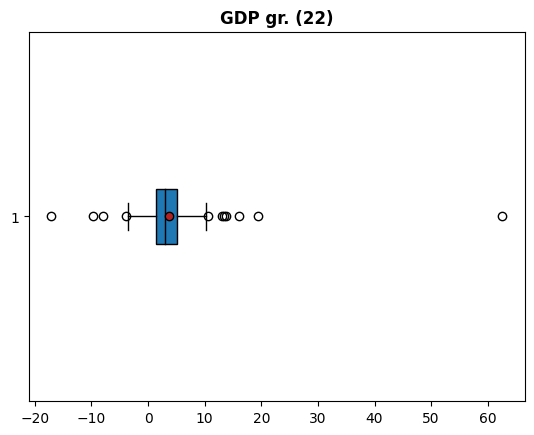

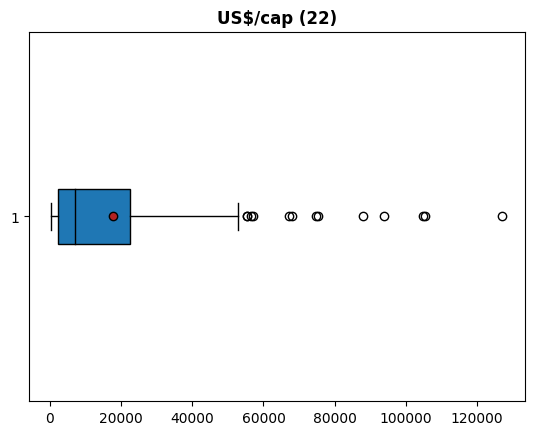

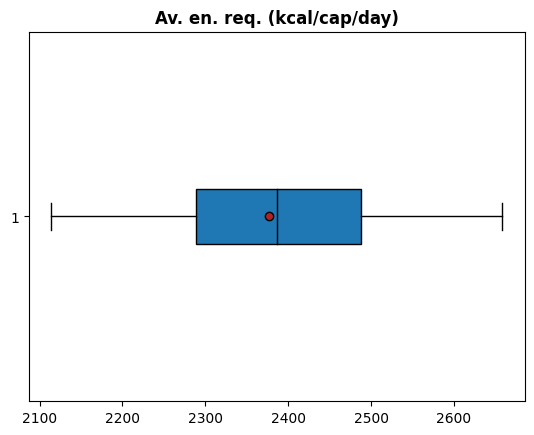

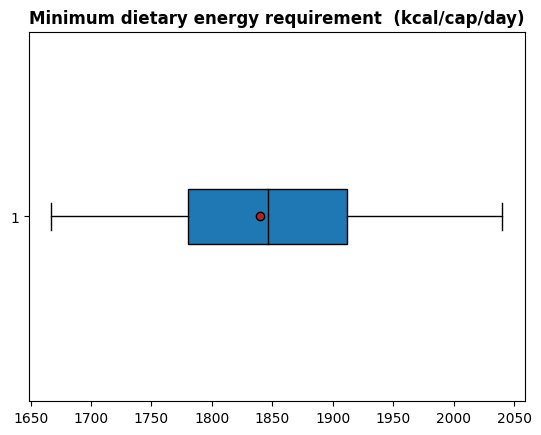

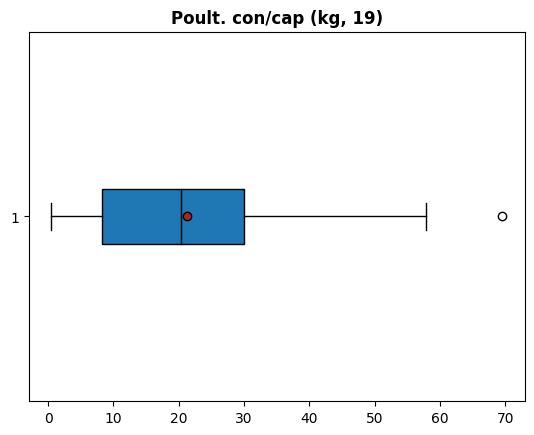

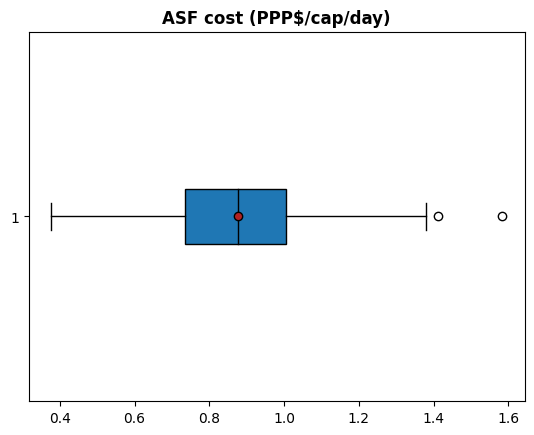

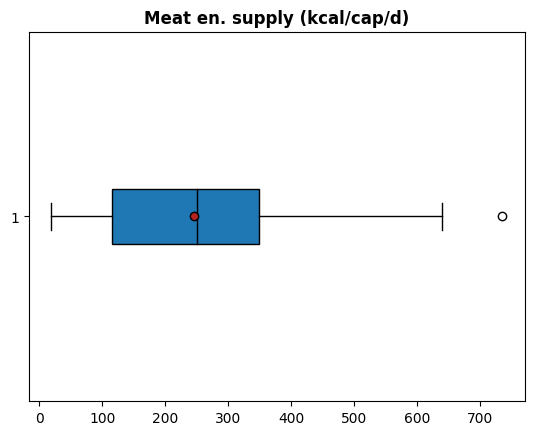

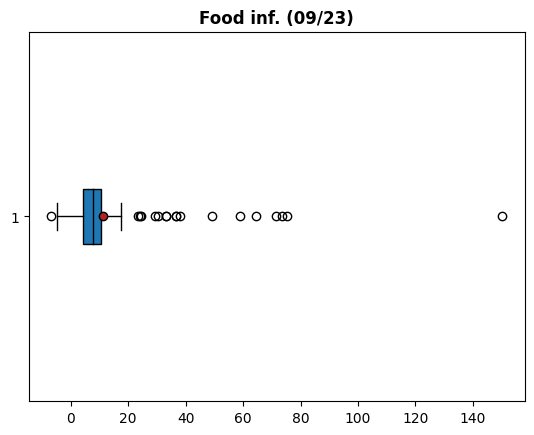

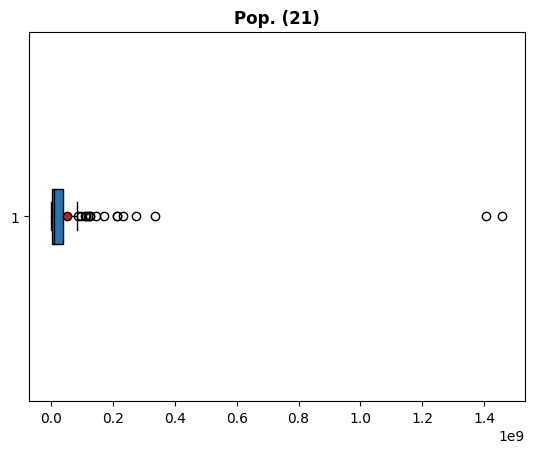

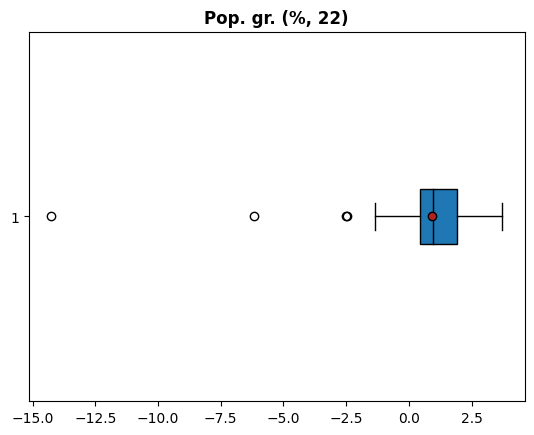

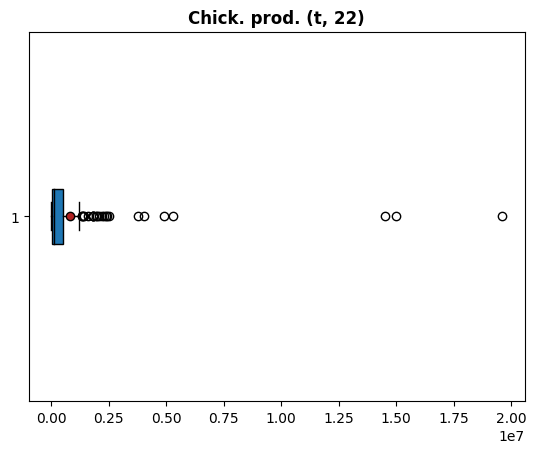

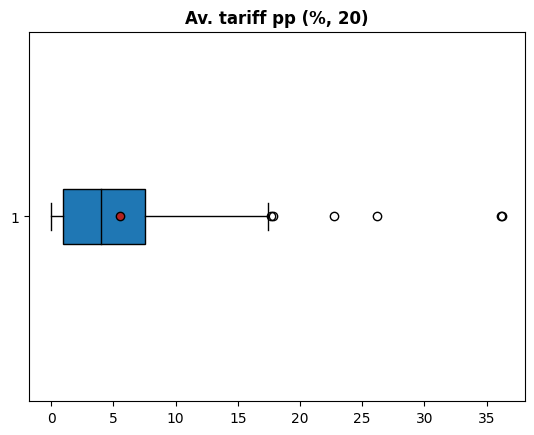

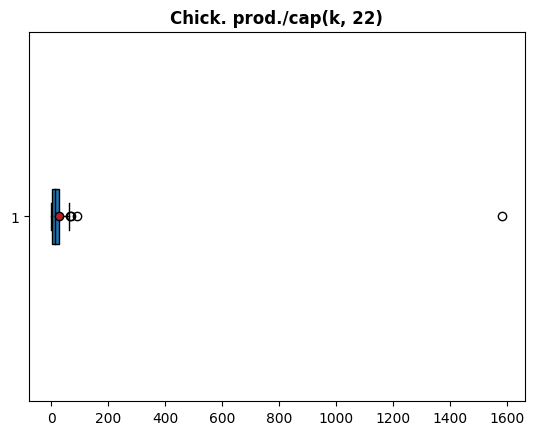

In [354]:
#boxplot pour chaque variable
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
for i in data.columns[1:]:
    plt.boxplot(data[i], vert=False, patch_artist=True, medianprops=medianprops, meanprops=meanprops, showmeans=True)
    plt.title(i, fontweight='bold')
    plt.show()

In [355]:
#quels sont les outliers dans chaque variable ?
for i in data.columns[1:]:
    print("Top 5 : " + i)
    print(data.sort_values(i, ascending=False).iloc[:5,0].reset_index(drop=True))
    print("Flop 5 : " + i)
    print(data.sort_values(i, ascending=True).iloc[:5,0].reset_index(drop=True))
    print("-------------------------")

Top 5 : GDP gr. (22)
0        Guyana
1          Fiji
2    Cabo Verde
3       Bahamas
4      Maldives
Name: country, dtype: object
Flop 5 : GDP gr. (22)
0       Ukraine
1    Seychelles
2     Sri Lanka
3       Belarus
4         Sudan
Name: country, dtype: object
--------
Top 5 : US$/cap (22)
0     Luxembourg
1        Ireland
2         Norway
3    Switzerland
4          Qatar
Name: country, dtype: object
Flop 5 : US$/cap (22)
0         Burundi
1    Sierra Leone
2      Madagascar
3         Liberia
4           Niger
Name: country, dtype: object
--------
Top 5 : Av. en. req. (kcal/cap/day)
0    United Arab Emirates
1                   Qatar
2              Luxembourg
3             Netherlands
4                   Malta
Name: country, dtype: object
Flop 5 : Av. en. req. (kcal/cap/day)
0       Burundi
1         Niger
2        Angola
3      Tanzania
4    Mozambique
Name: country, dtype: object
--------
Top 5 : Minimum dietary energy requirement  (kcal/cap/day)
0    United Arab Emirates
1         

# **Etape 4 - Export du fichier final**

In [356]:
#Mettre le dataset data sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes
data.to_excel('data.xlsx', index=False)